# Lab 7: Heart Attack
Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final rendered file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

The Data
In this lab, we will use medical data to predict the likelihood of a person experiencing an exercise-induced heart attack.

Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain (“angina”) during exercise. The information collected includes:

age : Age of the patient

sex : Sex of the patient

cp : Chest Pain type

Value 0: asymptomatic
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
trtbps : resting blood pressure (in mm Hg)

chol : cholesterol in mg/dl fetched via BMI sensor

restecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
thalach : maximum heart rate achieved during exercise

output : the doctor’s diagnosis of whether the patient is at risk for a heart attack

0 = not at risk of heart attack
1 = at risk of heart attack
Although it is not a formal question on this assignment, you should begin by reading in the dataset and briefly exploring and summarizing the data, and by adjusting any variables that need cleaning.



In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, RocCurveDisplay

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [4]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      273 non-null    int64
 1   sex      273 non-null    int64
 2   cp       273 non-null    int64
 3   trtbps   273 non-null    int64
 4   chol     273 non-null    int64
 5   restecg  273 non-null    int64
 6   thalach  273 non-null    int64
 7   output   273 non-null    int64
dtypes: int64(8)
memory usage: 17.2 KB


In [ ]:
y = ha["output"]
X = ha.drop(columns=["output"])

num_cols = ["age", "trtbps", "chol", "thalach"]
cat_cols = ["sex", "cp", "restecg"]

pre = ColumnTransformer(
    [("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_cols)
    ],
    remainder="drop"
)

# Part One: Fitting Models
This section asks you to create a final best model for each of the model types studied this week. For each, you should:

Find the best model based on ROC AUC for predicting the target variable.

Report the (cross-validated!) ROC AUC metric.

Fit the final model.

Output a confusion matrix; that is, the counts of how many observations fell into each predicted class for each true class.

(Where applicable) Interpret the coefficients and/or estimates produced by the model fit.

You should certainly try multiple model pipelines to find the best model. You do not need to include the output for every attempted model, but you should describe all of the models explored. You should include any hyperparameter tuning steps in your writeup as well.

Q1: KNN
Q2: Logistic Regression
Q3: Decision Tree
Q4: Interpretation
Which predictors were most important to predicting heart attack risk?

Q5: ROC Curve
Plot the ROC Curve for your three models above.

# KNN

In [ ]:
pipe_knn = Pipeline([
    ("pre", pre),
    ("knn", KNeighborsClassifier())
])

param_knn = {
    "knn__n_neighbors": [3, 5, 7, 9, 11]
}

gscv_knn = GridSearchCV(
    pipe_knn,
    param_grid=param_knn,
    cv=5,
    scoring="roc_auc"
)

gscv_knn.fit(X, y)

print("Best KNN params:", gscv_knn.best_params_)
print("Best KNN ROC AUC (cv):", gscv_knn.best_score_)

best_knn = gscv_knn.best_estimator_

y_pred_knn = best_knn.predict(X)
cm_knn = confusion_matrix(y, y_pred_knn)
pd.DataFrame(cm_knn,
index=["True 0", "True 1"],
columns=["Pred 0", "Pred 1"])

Best KNN params: {'knn__n_neighbors': 7}
Best KNN ROC AUC (cv): 0.7879434129089301


,Pred 0,Pred 1
True 0,109,18
True 1,36,110


For KNN, I used the preprocessing pipeline from class and tried different k-values (3, 5, 7, 9, 11). I picked the best model based on cross-validated ROC AUC. The best one ended up being k = 7, with a CV ROC AUC of 0.7879. After that, I refit the model on the full dataset and made the confusion matrix.

# Logistic Regression

In [12]:
pipe_log = Pipeline([
    ("pre", pre),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_log = {
    "logreg__C": [0.01, 0.1, 1, 10, 100]
}

gscv_log = GridSearchCV(
    pipe_log,
    param_grid=param_log,
    cv=5,
    scoring="roc_auc"
)

gscv_log.fit(X, y)

print("Best LogReg params:", gscv_log.best_params_)
print("Best LogReg ROC AUC (cv):", gscv_log.best_score_)

best_log = gscv_log.best_estimator_

y_pred_log = best_log.predict(X)
cm_log = confusion_matrix(y, y_pred_log)
pd.DataFrame(cm_log,
index=["True 0", "True 1"],
columns=["Pred 0", "Pred 1"])


Best LogReg params: {'logreg__C': 1}
Best LogReg ROC AUC (cv): 0.863533863837312


,Pred 0,Pred 1
True 0,96,31
True 1,23,123


In [16]:
log_features = best_log.named_steps["pre"].get_feature_names_out()
log_coefs = best_log.named_steps["logreg"].coef_[0]

coef_df = pd.DataFrame({
    "feature": log_features,
    "coef": log_coefs
}).sort_values("coef", key=np.abs, ascending=False)

coef_df.head(15)

,feature,coef
4,cat__sex_1,-1.799918
5,cat__cp_1,1.640636
6,cat__cp_2,1.614263
7,cat__cp_3,1.242462
3,num__thalach,0.774122
8,cat__restecg_1,0.338631
1,num__trtbps,-0.293623
2,num__chol,-0.260830
9,cat__restecg_2,-0.239053
0,num__age,-0.209173


For logistic regression, I kept the same pipeline and tuned over a range of C values: 0.01, 0.1, 1, 10, and 100. The best C was 1, and this model had the highest ROC AUC of all three models (CV ROC AUC = 0.8653). Then I refit it on the whole dataset and generated the confusion matrix and the table of coefficients.

# Decision Tree

In [ ]:
pipe_tree = Pipeline([
    ("pre", pre),
    ("tree", DecisionTreeClassifier(random_state=123))
])

param_tree = {
    "tree__max_depth": [2, 3, 4, 5, None]
}

gscv_tree = GridSearchCV(
    pipe_tree,
    param_grid=param_tree,
    cv=5,
    scoring="roc_auc"
)

gscv_tree.fit(X, y)

print("Best Tree params:", gscv_tree.best_params_)
print("Best Tree ROC AUC (cv):", gscv_tree.best_score_)

best_tree = gscv_tree.best_estimator_

y_pred_tree = best_tree.predict(X)
cm_tree = confusion_matrix(y, y_pred_tree)
pd.DataFrame(cm_tree,
index=["True 0", "True 1"],
columns=["Pred 0", "Pred 1"])


Best Tree params: {'tree__max_depth': 2}
Best Tree ROC AUC (cv): 0.7553025641025641


,Pred 0,Pred 1
True 0,93,34
True 1,40,106


In [14]:
tree_features = best_tree.named_steps["pre"].get_feature_names_out()
tree_importances = best_tree.named_steps["tree"].feature_importances_

imp_df = pd.DataFrame({
    "feature": tree_features,
    "importance": tree_importances
}).sort_values("importance", ascending=False)

imp_df.head(15)


,feature,importance
3,num__thalach,0.648216
0,num__age,0.185190
4,cat__sex_1,0.166594
1,num__trtbps,0.000000
2,num__chol,0.000000
5,cat__cp_1,0.000000
6,cat__cp_2,0.000000
7,cat__cp_3,0.000000
8,cat__restecg_1,0.000000
9,cat__restecg_2,0.000000


For the decision tree, I tuned over different max_depth values: 2, 3, 4, 5, and None. The best depth was 2, with a CV ROC AUC of 0.7553. I refit this final tree and created the confusion matrix and feature importance table. Almost all of the importance was on thalach, age, and sex.

# Interpretation

Based on both the logistic regression model and the decision tree, the most important predictors ended up being chest-pain type, maximum heart rate, age, and sex.
In the logistic regression, the chest-pain dummies (cp_1, cp_2, cp_3) all had the biggest positive coefficients, meaning those types of chest pain strongly increased the predicted risk. thalach (max heart rate) also had a pretty big positive coefficient.

The decision tree basically used three variables for almost all of its splits: thalach, age, and sex. thalach was by far the most important feature in the tree, with age and sex behind it.

So overall, the variables that mattered the most for predicting heart attack risk in this dataset were the chest-pain categories, maximum heart rate achieved, age, and sex.

# ROC Curve

In [18]:
from sklearn.metrics import roc_curve
from plotnine import ggplot, aes, geom_line, geom_abline, theme_bw, labs

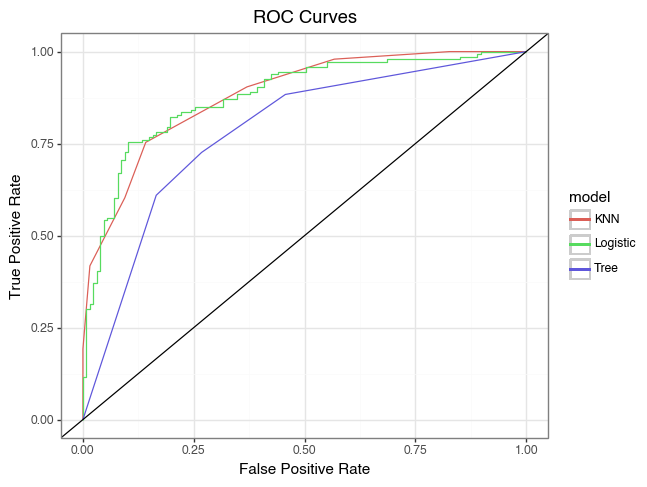

In [20]:
models = {
    "KNN": best_knn,
    "Logistic": best_log,
    "Tree": best_tree
}

rows = []

for name, model in models.items():
    prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, prob)
    rows.append(pd.DataFrame({"fpr": fpr, "tpr": tpr, "model": name}))

roc_df = pd.concat(rows)

(
    ggplot(roc_df, aes("fpr", "tpr", color="model"))
    + geom_line()
    + geom_abline(slope=1, intercept=0)
    + theme_bw()
    + labs(title="ROC Curves", x="False Positive Rate", y="True Positive Rate")
)


# Part Two: Metrics
Consider the following metrics:

True Positive Rate or Recall or Sensitivity = Of the observations that are truly Class A, how many were predicted to be Class A?

Precision or Positive Predictive Value = Of all the observations classified as Class A, how many of them were truly from Class A?

True Negative Rate or Specificity or Negative Predictive Value = Of all the observations classified as NOT Class A, how many were truly NOT Class A?

Compute each of these metrics (cross-validated) for your three models (KNN, Logistic Regression, and Decision Tree) in Part One.

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score,roc_auc_score
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

scoring = {
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    "specificity": make_scorer(specificity)
}

cv_knn = cross_validate(best_knn, X, y, cv=5, scoring=scoring)
cv_log = cross_validate(best_log, X, y, cv=5, scoring=scoring)
cv_tree = cross_validate(best_tree, X, y, cv=5, scoring=scoring)

print("KNN CV metrics:")
print("  Recall:", cv_knn["test_recall"].mean())
print("  Precision:", cv_knn["test_precision"].mean())
print("  Specificity:", cv_knn["test_specificity"].mean())

print("\nLogistic Regression CV metrics:")
print("  Recall:", cv_log["test_recall"].mean())
print("  Precision:", cv_log["test_precision"].mean())
print("  Specificity:", cv_log["test_specificity"].mean())

print("\nDecision Tree CV metrics:")
print("  Recall:", cv_tree["test_recall"].mean())
print("  Precision:", cv_tree["test_precision"].mean())
print("  Specificity:", cv_tree["test_specificity"].mean())

KNN CV metrics:
  Recall: 0.6921839080459771
  Precision: 0.7403815453384419
  Specificity: 0.7236923076923077

Logistic Regression CV metrics:
  Recall: 0.808735632183908
  Precision: 0.7922128543499511
  Specificity: 0.7384615384615385

Decision Tree CV metrics:
  Recall: 0.7342528735632183
  Precision: 0.7186378642900383
  Specificity: 0.6698461538461539


Recall (true positive rate): of the people who actually were at risk, how many the model caught.
KNN: 0.692
Logistic: 0.809
Tree: 0.734
Precision: of the people the model said were at risk, how many actually were.
KNN: 0.740
Logistic: 0.79
Tree: 0.717
Specificity: of the people who were not at risk, how many the model correctly said were not at risk.
KNN: 0.724
Logistic: 0.739
Tree: 0.670
Overall, logistic regression scores highest on all three metrics.

# Part Three: Discussion
Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.

Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.

Q1
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

Q1. Lawsuit risk if we miss a true heart attack case

Here I would look at recall, because the main problem is missing someone who actually is at risk. We want to catch as many true positives as possible.
Logistic regression had the highest recall (about 0.81), so that is the model I would go with. I’d expect its recall on new data to be around 0.8.

Q2. Hospital is overfull and wants fewer false alarms

In this case I would focus on precision, since the hospital doesn’t want to waste beds on people who aren’t actually high risk. High precision means fewer false positives.
Logistic regression again had the highest precision (around 0.79), so I’d recommend that model. I’d expect its precision to be close to 0.78–0.80 on future patients.

Q3. Hospital wants to understand biological causes

Here interpretability matters more than who gets the best AUC. Logistic regression is the best choice because the coefficients directly show how each variable affects the predicted risk.
The tree is also interpretable, but logistic regression is clearer and performed better overall. Its ROC AUC was about 0.86, and I’d expect similar performance on new data.

Q4. Comparing new doctors to the algorithm

For this, I’d look at overall accuracy, because we basically want to see how often the model gets the correct label so we can compare that to the doctors’ decisions.
Logistic regression had the best results overall in every major metric, so that’s the model I’d use for comparison. I’d expect it to keep similar accuracy and general performance on new data.

# Part Four: Validation
Before sharing the dataset with you, I set aside a random 10% of the observations to serve as a final validation set.

ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")

Use each of your final models in Part One Q1-3, predict the target variable in the validation dataset.

For each, output a confusion matrix, and report the ROC AUC, the precision, and the recall.

Compare these values to the cross-validated estimates you reported in Part One and Part Two. Did our measure of model success turn out to be approximately correct for the validation data?

In [25]:
ha_val = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
ha_val.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,41,0,1,130,204,0,172,1
1,64,1,3,110,211,0,144,1
2,59,1,0,135,234,1,161,1
3,42,1,0,140,226,1,178,1
4,40,1,3,140,199,1,178,1


In [27]:
X_val = ha_val.drop(columns=["output"])
y_val = ha_val["output"]

In [30]:
y_pred_knn = best_knn.predict(X_val)
y_prob_knn = best_knn.predict_proba(X_val)[:, 1]

print("KNN Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_knn))
print("KNN ROC AUC:", roc_auc_score(y_val, y_prob_knn))
print("KNN Precision:", precision_score(y_val, y_pred_knn))
print("KNN Recall:", recall_score(y_val, y_pred_knn))

y_pred_log = best_log.predict(X_val)
y_prob_log = best_log.predict_proba(X_val)[:, 1]

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_log))
print("Logistic ROC AUC:", roc_auc_score(y_val, y_prob_log))
print("Logistic Precision:", precision_score(y_val, y_pred_log))
print("Logistic Recall:", recall_score(y_val, y_pred_log))

y_pred_tree = best_tree.predict(X_val)
y_prob_tree = best_tree.predict_proba(X_val)[:, 1]

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_tree))
print("Tree ROC AUC:", roc_auc_score(y_val, y_prob_tree))
print("Tree Precision:", precision_score(y_val, y_pred_tree))
print("Tree Recall:", recall_score(y_val, y_pred_tree))


KNN Confusion Matrix:
[[ 8  3]
 [ 7 12]]
KNN ROC AUC: 0.8014354066985646
KNN Precision: 0.8
KNN Recall: 0.631578947368421

Logistic Regression Confusion Matrix:
[[ 8  3]
 [ 4 15]]
Logistic ROC AUC: 0.8755980861244018
Logistic Precision: 0.8333333333333334
Logistic Recall: 0.7894736842105263

Decision Tree Confusion Matrix:
[[ 9  2]
 [ 7 12]]
Tree ROC AUC: 0.7846889952153109
Tree Precision: 0.8571428571428571
Tree Recall: 0.631578947368421


Compared to the cross-validated numbers from earlier, the validation results were pretty close and followed the exact same pattern. Logistic regression was the strongest model before, and it stayed the strongest on the validation set (CV AUC was about 0.86 and the validation AUC was about 0.88). KNN stayed in the middle, and the decision tree was still the weakest overall.

The recall and precision values were also very similar to the CV estimates. For example, logistic regression had around 0.81 recall during cross-validation and got about 0.79 on the validation set. KNN and the tree showed the same kind of consistency.

Overall, the cross-validation results were a good prediction of how all three models performed on new data.

# Part Five: Cohen’s Kappa
Another common metric used in classification is Cohen’s Kappa.

Use online resources to research this measurement. Calculate it for the models from Part One, Q1-3, and discuss reasons or scenarios that would make us prefer to use this metric as our measure of model success. Do your conclusions from above change if you judge your models using Cohen’s Kappa instead? Does this make sense?

In [32]:
from sklearn.metrics import cohen_kappa_score

y_true = y  

y_pred_knn = best_knn.predict(X)
kappa_knn = cohen_kappa_score(y_true, y_pred_knn)

y_pred_log = best_log.predict(X)
kappa_log = cohen_kappa_score(y_true, y_pred_log)

y_pred_tree = best_tree.predict(X)
kappa_tree = cohen_kappa_score(y_true, y_pred_tree)

print("KNN Cohen's Kappa:", round(kappa_knn, 3))
print("Logistic Regression Cohen's Kappa:", round(kappa_log, 3))
print("Decision Tree Cohen's Kappa:", round(kappa_tree, 3))

KNN Cohen's Kappa: 0.606
Logistic Regression Cohen's Kappa: 0.601
Decision Tree Cohen's Kappa: 0.457


Cohen’s Kappa measures how much the model’s predictions agree with the true labels after accounting for agreement that could happen just by chance. It’s useful when the classes might be imbalanced or when simple accuracy could be misleading, because Kappa adjusts for random agreement.

My Kappa values were:
KNN: 0.606
Logistic Regression: 0.601
Decision Tree: 0.457

We would prefer Kappa in situations where we want an overall agreement measure, not just how well we catch the positives or negatives
Using Kappa doesn’t change my conclusions from earlier. KNN and logistic regression are still the best models, and the tree is still the weakest. So the results make sense and line up with everything from the earlier parts.